# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.161264e+01     7.610652e+00
 * time: 0.0027379989624023438
     1     2.969828e+01     4.518048e+00
 * time: 0.012235164642333984
     2     1.916960e+01     3.972148e+00
 * time: 0.023638010025024414
     3     1.274490e+01     2.812975e+00
 * time: 0.034922122955322266
     4     1.251768e+01     3.143458e+00
 * time: 0.043923139572143555
     5     1.181229e+01     2.567866e+00
 * time: 0.05295109748840332
     6     1.044395e+01     1.946306e+00
 * time: 0.061994075775146484
     7     9.104943e+00     1.326922e+00
 * time: 0.07105398178100586
     8     8.329215e+00     7.586668e-01
 * time: 0.08006405830383301
     9     8.087925e+00     4.192974e-01
 * time: 0.08914899826049805
    10     8.073521e+00     7.758523e-01
 * time: 0.09624314308166504
    11     8.009029e+00     7.300502e-01
 * time: 0.10313701629638672
    12     7.949664e+00     5.521531e-01
 * time: 0.11213016510009766
    13     7.919114e+00     6.619197e-01
 

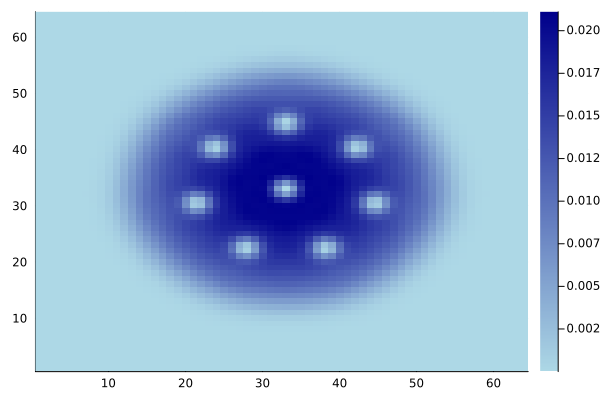

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)